# LAb4: Modelos polinomiais

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Fabio Dias
## Número: 42921

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab4.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Discriminantes polinomiais:
### Considere o ficheiro pickle $\texttt{Lab4-data-P1.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "data":       dados bi-dimensionais (4000 amostras)
* #### "target":     classe dos dados (inteiros de 0 a 3)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores
## a) Use os dados de treino para estimar discriminante polinomial de 4ª ordem.
## b) Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
## c) Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.
## d) Explique brevemente porque é que mais de metade dos pontos da classe "0" não são bem classificados 

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
D=pickle.load(open('Lab4-data-P1.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


## 1.a)

In [88]:
X = D['data']
y = D['target']
f1 = D['foldTrain']
f2 = D['foldTest']

#Conjunto de Treino
X1 = X[:, f1]
y1 = y[f1]

#Conjunto de Teste
X2 = X[:, f2]
y2 = y[f2]

print(X1.shape)
print(y1.shape)

print(X2.shape)
print(y2.shape)
#Existem mais pontos de teste do que de treino. Isto está ao contrário?

(2, 400)
(400,)
(2, 3600)
(3600,)


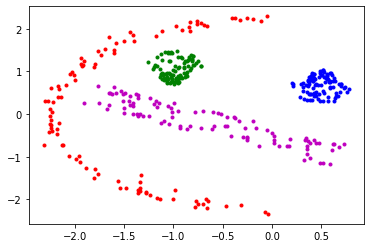

In [89]:
plt.plot(X1[0, y1==0], X1[1, y1==0], '.r')
plt.plot(X1[0, y1==1], X1[1, y1==1], '.g')
plt.plot(X1[0, y1==2], X1[1, y1==2], '.b')
plt.plot(X1[0, y1==3], X1[1, y1==3], '.m')

In [90]:
import sklearn.preprocessing as pp
import scipy.linalg as la

poly = pp.PolynomialFeatures(4).fit(X1.T)
Xp = poly.transform(X1.T).T

Y = -np.ones((np.unique(y1).shape[0], X1.shape[1]))

for i in range(np.unique(y1).shape[0]):
    Y[i, y1==i] = 1

Rx = np.dot(Xp, Xp.T)
rxy = np.dot(Xp, Y.T)
W = np.dot(la.pinv(Rx), rxy)

yb = np.dot(W.T, Xp)
ye = np.argmax(yb, axis=0)

## 1.b)

In [91]:
X2p = poly.transform(X2.T).T
y2b = np.dot(W.T, X2p)
y2e = np.argmax(y2b, axis=0)

print("Numero Total de Erros de Treino: ", np.sum(y1 != ye))
print(confusion_matrix(y1, ye))

print("Numero Total de Erros de Teste: ", np.sum(y2 != y2e))
print(confusion_matrix(y2, y2e))    #Muitos erros de teste. Acho que o modelo está em sobreaprendizagem, mas tem
                                    #poucos pontos de treino. Deve ser por causa dessa limitação. Acho que não é sobreaprendizagem.

Numero Total de Erros de Treino:  1
[[ 99   0   0   1]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]
Numero Total de Erros de Teste:  484
[[419 325  55 101]
 [  0 900   0   0]
 [  0   0 900   0]
 [  3   0   0 897]]


## 1.c)

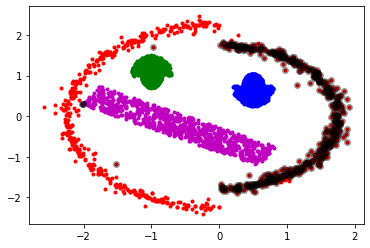

In [92]:
plt.plot(X2[0, y2==0], X2[1, y2==0], '.r')
plt.plot(X2[0, y2==1], X2[1, y2==1], '.g')
plt.plot(X2[0, y2==2], X2[1, y2==2], '.b')
plt.plot(X2[0, y2==3], X2[1, y2==3], '.m')
plt.plot(X2[0, y2!=y2e], X2[1, y2!=y2e], 'ok', alpha=0.3)

## 1.d)

É importante notar que os dados de treino são muito menos do que os de teste, logo existe a grande possibilidade do modelo não se conseguir adaptar correctamente para discriminar os dados de teste.

Como podemos observar no "plot" dos dados de treino, apenas foram tidos em conta os pontos que se encontravam no lado esquerdo, para a classe 0, da sua distribuição.

O discriminante, ao encontrar estes pontos no lado direito, nos dados de teste, assume serem de outra classe dado que não encontrou nenhum ponto da classe 0 nesses locais.

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Regressão polinomial:
### Considere o ficheiro pickle $\texttt{Lab4-data-P2.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "x":       dados uni-dimensionais/variável independente (500 pontos)
* #### "y":       variável dependente/saídas desejadas (500 pontos)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores

## a) Use os dados de treino para estimar um regressor polinomial de 5ª ordem. Imprima os valores dos pesos.
## b) Calcule o coeficiente de determinação ($\bf R^2$) para os dados de treino e para os dados de teste.
## c) Faça um "plot" do polinómio estimado. Visualize o polinómio conjutamente com os dados de teste. 
## d)  Explique brevemente porque é que o modelo não está bem adaptado aos dados de teste.

In [93]:
D=pickle.load(open('Lab4-data-P2.p','rb'))
D.keys()

dict_keys(['x', 'y', 'foldTrain', 'foldTest'])

(500,)
(500,)


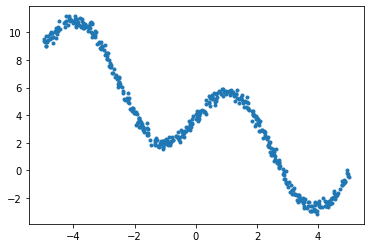

In [94]:
x = D['x']
y = D['y']
f1 = D['foldTrain']
f2 = D['foldTest']

print(x.shape)
print(y.shape)

plt.plot(x, y, '.')

(250,)
(250,)


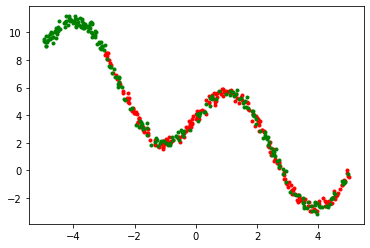

In [95]:
#Conjunto de Treino
x1 = x[f1]
y1 = y[f1]

#Conjunto de Teste
x2 = x[f2]
y2 = y[f2]

print(x1.shape)
print(x2.shape)

plt.plot(x1, y1, '.r')
plt.plot(x2, y2, '.g')

## 2.a)

In [96]:
import scipy.linalg as la

X1 = np.vstack((x1**5, x1**4, x1**3, x1**2, x1, np.ones((1, x1.shape[0]))))

Rx = np.dot(X1, X1.T) #matriz 6x6
rxy = np.dot(X1, y1.T) #vector 6x1
w = np.dot(la.pinv(Rx), rxy)

print(w)

[ 0.00883479  0.03881964 -0.45238482 -0.25033723  1.66738131  3.94647968]


## 2.b)

In [97]:
yh = np.dot(w.T, X1)

my1 = np.mean(y1) #Media de y1
SQtot = np.sum((y1 - my1) ** 2) #Soma dos Quadrados de y1
SQres = np.sum((y1 - yh) ** 2) #Potência do Erro y1

R2 = 1.0 - SQres / SQtot
print(R2) #Expectável, dado que temos um grau muito grande no polinómio

0.961163242355513


## 2.c)

-0.8716026083337618


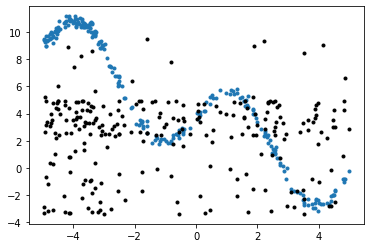

In [98]:
#Dados de Treino
#plt.plot(x1, y1, '.')
#plt.plot(x1, yh, '.k') #Neste caso, como expectável, o polinómio está muito próximo de coincidir totalmente com os 
                        #pontos de treino. Dai o seu R2 (score) ser tão elevado.

#Dados de Teste
plt.plot(x2, y2, '.')

#Polinomio Estimado
plt.plot(x2, yh, '.k') #Neste caso, o polinómio falha quase todos os pontos. Sobreaprendizagem.

my2 = np.mean(y2) #Media de y2
SQtot2 = np.sum((y2 - my2) ** 2) #Soma dos Quadrados de y2
SQres2 = np.sum((y2 - yh) ** 2) #Potência do Erro y2

R2 = 1.0 - SQres2 / SQtot2
print(R2) #Confirmado, sobreaprendizagem

## 2.d)

O facto do R2 possuir um valor negativo é um claro sinal que as coisas estão a ser mal classificadas.<br>
Um valor negativo significa que a potência do erro varia mais que os próprios y's.

Este modelo está a ter um bom desempenho para os dados de treino, mas ao chegar aos dados de teste falha redondamente.

Este modelo está a entrar em sobreaprendizagem.

Quanto maior for a ordem do polinómio do modelo, mais fácil é esse modelo entrar em sobreaprendizagem.